In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Import and Clean Data

In [2]:
nonprofit_data = np.load('data_safe_new.npy', allow_pickle = True)

In [3]:
nonprofit_data[0]

array(['UNITED STATES AIKIDO FEDERATION', 'CT', '7', '2018', '2',
       '536236.0', '558056.0', '303268.0', '203.0', '0', 'No', '142501.0',
       '0', '0', '99.75', '0.25'], dtype=object)

In [4]:
df = pd.DataFrame(nonprofit_data, columns = ['name','state','num_governing','filing_year','num_employees','total_revenue','total_expenses'
                                             ,'total_assets','total_liabilities','salaries_paid','independent_audit','exec_comp_org','exec_comp_related'
                                             ,'exec_comp_other','percent_publicsupport', 'percent_investmentincome'])




In [5]:
new_df = df.drop_duplicates( subset=None, keep="first", inplace=False).reset_index()
new_df = new_df.drop('index', axis = 1)


In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      1301 non-null   object
 1   state                     1301 non-null   object
 2   num_governing             1301 non-null   object
 3   filing_year               1301 non-null   object
 4   num_employees             1301 non-null   object
 5   total_revenue             1301 non-null   object
 6   total_expenses            1301 non-null   object
 7   total_assets              1301 non-null   object
 8   total_liabilities         1301 non-null   object
 9   salaries_paid             1301 non-null   object
 10  independent_audit         1301 non-null   object
 11  exec_comp_org             1301 non-null   object
 12  exec_comp_related         1301 non-null   object
 13  exec_comp_other           1301 non-null   object
 14  percent_publicsupport   

In [7]:
new_df['num_governing'] = new_df['num_governing'].astype(int)
new_df['num_employees'] = new_df['num_employees'].astype(int)
new_df['total_revenue'] = new_df['total_revenue'].astype(float).astype(int)
new_df['total_expenses'] = new_df['total_expenses'].astype(float).astype(int)
new_df['total_assets'] = new_df['total_assets'].astype(float).astype(int)
new_df['total_liabilities'] = new_df['total_liabilities'].astype(float).astype(int)
new_df['salaries_paid'] = new_df['salaries_paid'].astype(float).astype(int)
new_df['exec_comp_org'] = new_df['exec_comp_org'].astype(float).astype(int)
new_df['exec_comp_related'] = new_df['exec_comp_related'].astype(float).astype(int)
new_df['exec_comp_other'] = new_df['exec_comp_other'].astype(float).astype(int)
new_df['percent_publicsupport'] = new_df['percent_publicsupport'].astype(float)
new_df['percent_investmentincome'] = new_df['percent_investmentincome'].astype(float)

In [8]:
#new_df['state']== 'NY'
#new_df[new_df['state']== 'DC'].count()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      1301 non-null   object 
 1   state                     1301 non-null   object 
 2   num_governing             1301 non-null   int64  
 3   filing_year               1301 non-null   object 
 4   num_employees             1301 non-null   int64  
 5   total_revenue             1301 non-null   int64  
 6   total_expenses            1301 non-null   int64  
 7   total_assets              1301 non-null   int64  
 8   total_liabilities         1301 non-null   int64  
 9   salaries_paid             1301 non-null   int64  
 10  independent_audit         1301 non-null   object 
 11  exec_comp_org             1301 non-null   int64  
 12  exec_comp_related         1301 non-null   int64  
 13  exec_comp_other           1301 non-null   int64  
 14  percent_

# Restrict Data to relevant columns and rows

In [9]:
new_df = new_df.drop(new_df[new_df.num_governing==0].index).reset_index()
new_df = new_df.drop('index', axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      1274 non-null   object 
 1   state                     1274 non-null   object 
 2   num_governing             1274 non-null   int64  
 3   filing_year               1274 non-null   object 
 4   num_employees             1274 non-null   int64  
 5   total_revenue             1274 non-null   int64  
 6   total_expenses            1274 non-null   int64  
 7   total_assets              1274 non-null   int64  
 8   total_liabilities         1274 non-null   int64  
 9   salaries_paid             1274 non-null   int64  
 10  independent_audit         1274 non-null   object 
 11  exec_comp_org             1274 non-null   int64  
 12  exec_comp_related         1274 non-null   int64  
 13  exec_comp_other           1274 non-null   int64  
 14  percent_

In [10]:
new_df['total_exec_comp'] = (new_df['exec_comp_org']+new_df['exec_comp_related']+new_df['exec_comp_other'])

In [11]:
new_df[new_df['total_exec_comp']>4000000]

,name,state,num_governing,filing_year,num_employees,total_revenue,total_expenses,total_assets,total_liabilities,salaries_paid,independent_audit,exec_comp_org,exec_comp_related,exec_comp_other,percent_publicsupport,percent_investmentincome,total_exec_comp
7,UNITED STATES OLYMPIC COMMITTEE,CO,13,2019,567,193689799,248314795,297064938,81875779,0,Yes,4844338,120147,416510,0.000,0.000,5380995
11,Bon Secours - St Francis Health System Foundat...,SC,27,2018,0,3129779,3042624,12343374,0,0,Yes,0,9787364,856436,0.000,0.000,10643800
13,St Vincent's Medical Center-Clay County Inc,FL,10,2018,749,121850321,102110020,103105269,16567276,0,Yes,910197,7024313,608179,0.000,0.000,8542689
30,The United States Olympic Endowment,CO,11,2018,2,6404304,11258485,295385334,110298618,0,Yes,186763,3814679,33871,0.000,0.000,4035313
39,NEBRASKA HEART HOSPITAL,NE,16,2017,439,86559593,68274557,169961641,17119086,0,Yes,686401,4568650,560478,0.000,0.000,5815529
56,MERCY HOSPITAL ADA INC,OK,11,2018,0,107190713,105181798,63003401,43281844,0,Yes,1544209,5195846,556588,0.000,0.000,7296643
59,United States Golf Association,NJ,15,2019,485,230989875,199712427,509493063,124262947,0,Yes,6630657,0,678336,44.800,7.216,7308993
61,UNITED STATES TELECOM ASSOCIATION,DC,17,2018,40,13240900,13124945,22205740,6733587,0,Yes,4858353,0,402846,0.000,0.000,5261199
81,The United States Holocaust Memorial Museum,DC,65,2018,510,164810706,126926273,724549508,93418987,0,Yes,3578935,0,738986,0.000,0.000,4317921
90,UNITED STATES TENNIS ASSOCIATION INCORPORATED,NY,14,2018,875,320340118,297907311,387051404,72088464,0,Yes,8672009,0,689209,0.000,0.000,9361218


In [12]:
new_df.drop(new_df[new_df['total_exec_comp']>4000000].index, axis = 0, inplace = True)


In [13]:
new_df.drop(['exec_comp_org','exec_comp_related','exec_comp_other', 'salaries_paid' ], axis = 1, inplace = True)


# First Look at clean Data

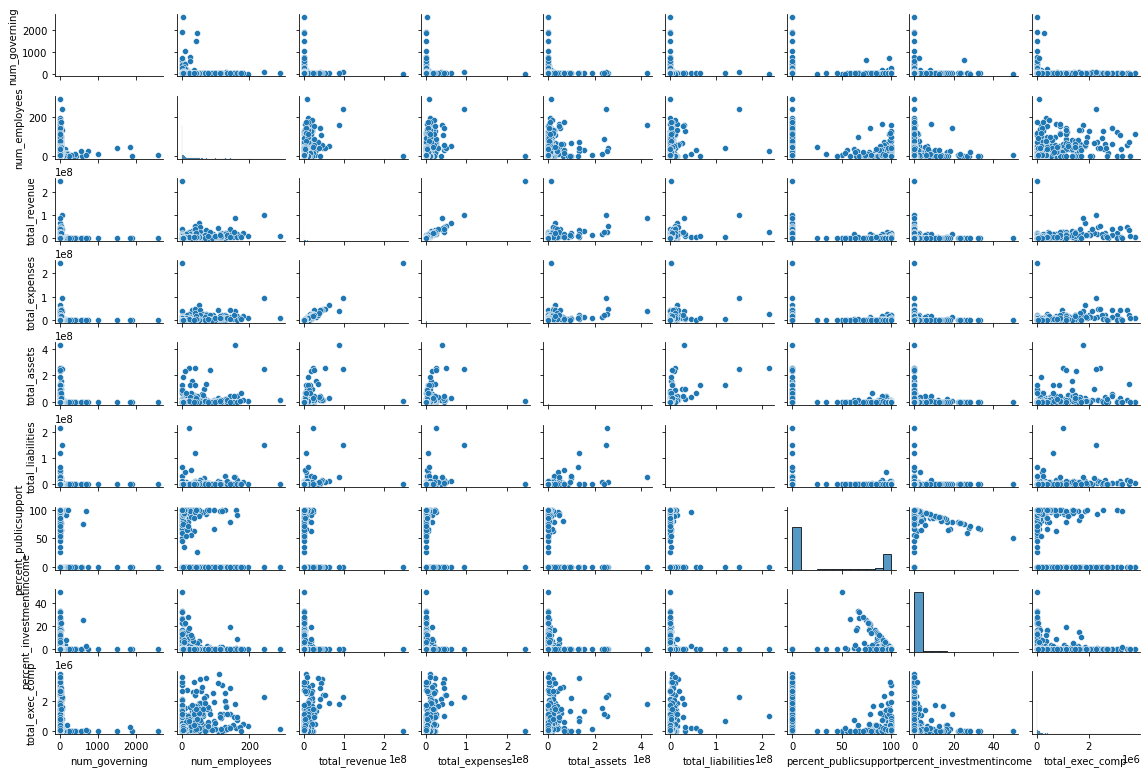

In [14]:
sns.pairplot(new_df, height=1.2, aspect=1.5);

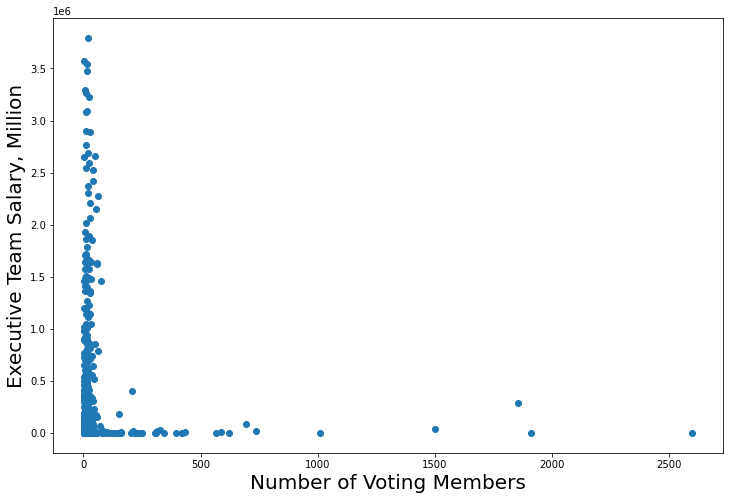

In [249]:
fig = plt.figure(figsize=(12,8))
plt.scatter(new_df['num_governing'], new_df['total_exec_comp']);
plt.xlabel('Number of Voting Members', fontsize = 20)
plt.ylabel('Executive Team Salary, Million',fontsize = 20);

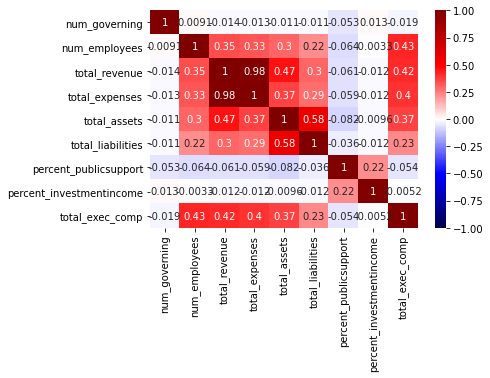

In [15]:
sns.heatmap(new_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [16]:
Y, X = patsy.dmatrices('''total_exec_comp ~ num_governing + filing_year + num_employees 
                       + total_revenue + total_expenses + total_assets + total_liabilities 
                       + percent_publicsupport + percent_investmentincome'''
                       , data=new_df, return_type="dataframe")
model = sm.OLS(Y, X)

fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_exec_comp   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     39.68
Date:                Thu, 15 Apr 2021   Prob (F-statistic):           3.09e-84
Time:                        22:20:33   Log-Likelihood:                -17827.
No. Observations:                1241   AIC:                         3.568e+04
Df Residuals:                    1227   BIC:                         3.575e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -3665.9043   1.28e+05     -0.029      0.977   -2.54e+05    2.47e+05
filing_year[T.2015]      -2.001e+04   1.74e+05     -0.115      0.908   -3.61e+05    3.21e+05
filing_year[T.2016]       6472.4932   1.47e+05      0.044      0.965   -2.82e+05    2.95e+05
filing_year[T.2017]        7.32e+04   1.35e+05      0.543      0.587   -1.91e+05    3.38e+05
filing_year[T.2018]       8.995e+04   1.28e+05      0.702      0.483   -1.61e+05    3.41e+05
filing_year[T.2019]       1.187e+05    1.3e+05      0.913      0.361   -1.36e+05    3.74e+05
num_governing              -62.7906     93.792     -0.669      0.503    -246.801     121.219
num_employees             4913.1281    443.296     11.083      0.000    4043.426    5782.830
total_revenue               -0.0157      0.008     -1.964      0.050      -0.031   -1.69e-05
total_expenses               0.0286      0.008      3.543      0.000       0.013       0.044
total_assets                 0.0054      0.001      6.558      0.000       0.004       0.007
total_liabilities           -0.0022      0.002     -1.269      0.205      -0.006       0.001
percent_publicsupport      -20.9144    281.082     -0.074      0.941    -572.369     530.540
percent_investmentincome   -35.4131   3704.161     -0.010      0.992   -7302.604    7231.777
==============================================================================
Omnibus:                      929.686   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26441.354
Skew:                           3.161   Prob(JB):                         0.00
Kurtosis:                      24.711   Cond. No.                     6.86e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.86e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Drop Zero compensation Non-profits. 
### Seems to be another regression problem

In [17]:
bool_map = {"Yes": 1, "No": 0}

In [18]:
new_df_nozero = new_df.drop(new_df[new_df.total_exec_comp ==0].index).reset_index()
new_df_nozero = new_df_nozero.drop('index', axis = 1)

new_df_nozero['independent_audit'] = new_df_nozero['independent_audit'].map(bool_map)
# scaler = MinMaxScaler(feature_range=(0, 1))
# mm_new_df_nozero = scaler.fit_transform(new_df_nozero[[ 'total_exec_comp','non_profit_size','num_governing','independent_audit','percent_publicsupport', 'percent_investmentincome']].values)


In [19]:
# mm_new_df_nozero = pd.DataFrame(mm_new_df_nozero, columns = ['total_exec_comp','non_profit_size','num_governing','independent_audit','percent_publicsupport', 'percent_investmentincome'])
# mm_new_df_nozero
new_df_nozero

,name,state,num_governing,filing_year,num_employees,total_revenue,total_expenses,total_assets,total_liabilities,independent_audit,percent_publicsupport,percent_investmentincome,total_exec_comp
0,UNITED STATES AIKIDO FEDERATION,CT,7,2018,2,536236,558056,303268,203,0,99.750,0.250,142501
1,Mercy Hospital of Devils Lake Foundation,ND,7,2018,0,77843,11288,402095,3457,1,0.000,0.000,537319
2,VICTORY LAKESIDE INC,MD,3,2019,0,687190,610895,3161742,2730911,1,0.000,0.000,773018
3,United States Justice Foundation,AZ,5,2018,1,575601,727879,120230,100851,1,0.000,0.000,106397
4,Christian Surfers United States,FL,6,2019,2,346638,326569,52807,0,0,94.130,0.000,35972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,CITY ACCESS NEW YORK INC,NY,8,2018,41,3100071,3131090,1652680,228581,1,99.900,0.100,134042
664,EDIBLE SCHOOLYARD NYC,NY,20,2018,37,2325191,2130602,1239253,15023,1,84.960,0.020,397946
665,NEW YORK CITY H2O,NY,7,2018,0,251960,237267,31496,0,0,100.000,0.000,60000
666,NEW YORK FELLOWSHIP INC,NY,7,2018,3,327144,387484,639845,13559,0,0.000,0.000,209260


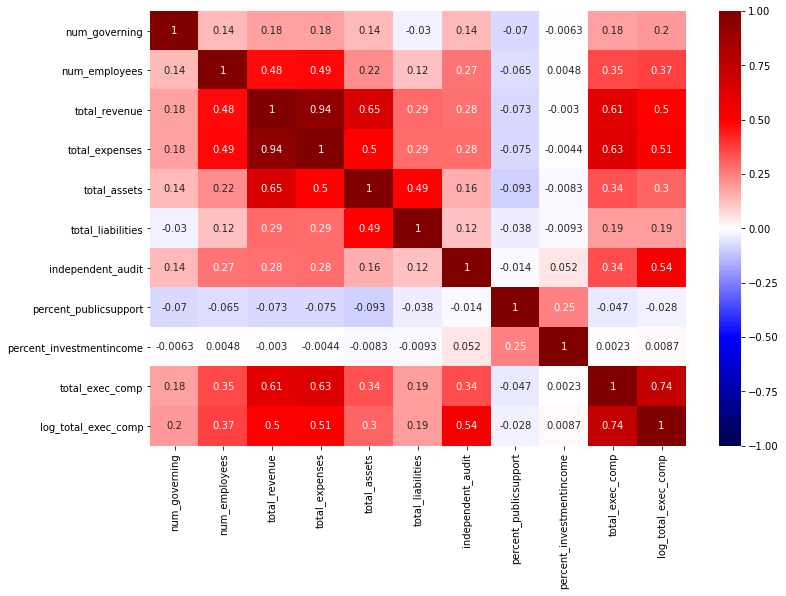

In [247]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(new_df_nozero.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [21]:
new_df_nozero.drop(new_df_nozero[new_df_nozero['num_governing']>50].index, inplace = True)

In [22]:
new_df_nozero.shape

(643, 13)

In [251]:

Y, X = patsy.dmatrices('''total_exec_comp ~ num_governing + independent_audit + total_assets+
                         percent_publicsupport + percent_investmentincome +num_employees''' 
                       , data=new_df_nozero, return_type="dataframe")
model = sm.OLS(Y, X)

fit = model.fit()
prediction = fit.predict()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_exec_comp   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     36.73
Date:                Thu, 15 Apr 2021   Prob (F-statistic):           2.85e-38
Time:                        23:26:03   Log-Likelihood:                -9386.1
No. Observations:                 642   AIC:                         1.879e+04
Df Residuals:                     635   BIC:                         1.882e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -9291.1750   4.64e+04     -0.200      0.841      -1e+05    8.18e+04
num_governing             6299.1469   2498.721      2.521      0.012    1392.392    1.12e+04
independent_audit         2.983e+05   4.59e+04      6.500      0.000    2.08e+05    3.88e+05
total_assets                 0.0050      0.001      6.789      0.000       0.004       0.006
percent_publicsupport       31.8319    513.468      0.062      0.951    -976.468    1040.132
percent_investmentincome -1827.8899   7261.435     -0.252      0.801   -1.61e+04    1.24e+04
num_employees             3965.3016    642.614      6.171      0.000    2703.397    5227.206
==============================================================================
Omnibus:                      402.540   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3744.887
Skew:                           2.738   Prob(JB):                         0.00
Kurtosis:                      13.489   Cond. No.                     8.01e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

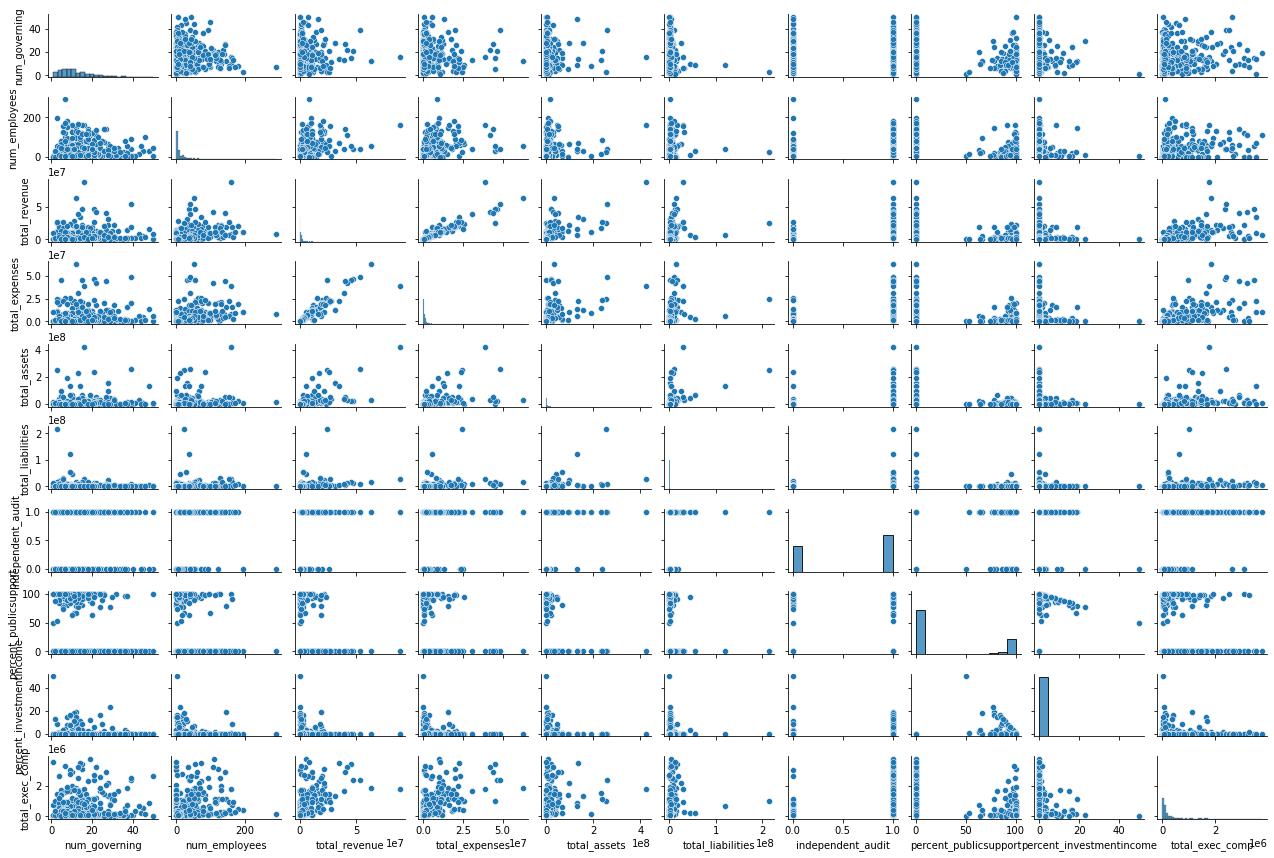

In [24]:
sns.pairplot(new_df_nozero, height=1.2, aspect=1.5);

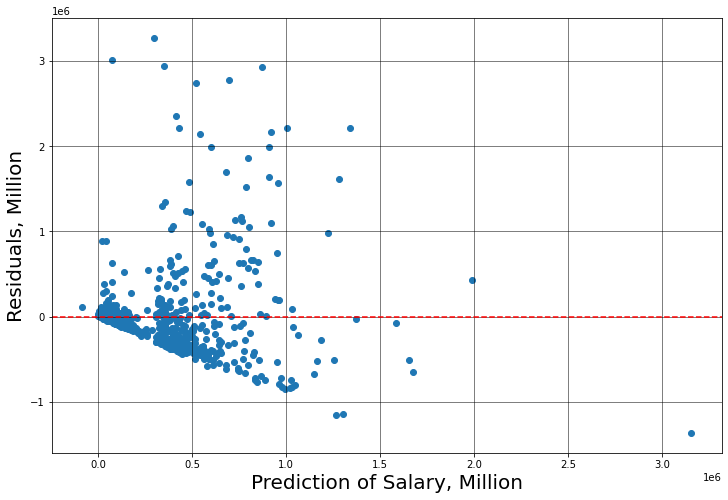

In [254]:
# Use statsmodels to plot the residuals vs the fitted values

fig = plt.figure(figsize=(12,8))
plt.grid(color='black', linestyle='-', linewidth=.5)
plt.scatter(fit.predict(), fit.resid);
plt.axhline(y=0, color = 'r', ls = '--')
plt.xlabel('Prediction of Salary, Million', fontsize = 20)
plt.ylabel('Residuals, Million',fontsize = 20);
#fig.savefig('PredictvsResiduals.png', dpi=fig.dpi)

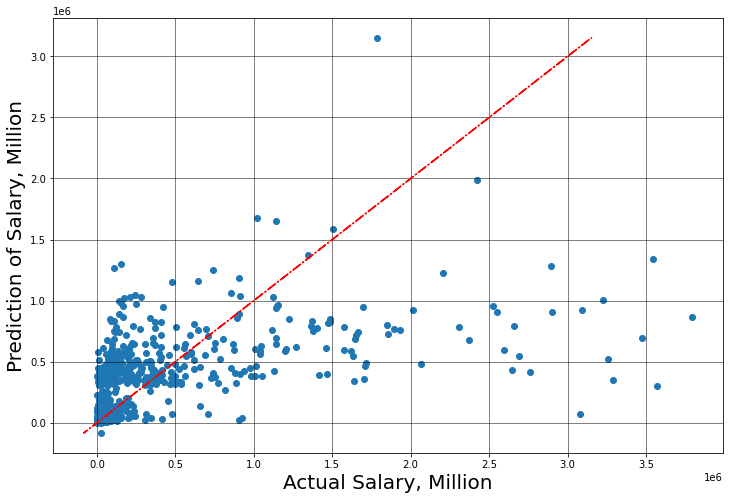

In [255]:
fig = plt.figure(figsize=(12,8))
plt.grid(color='black', linestyle='-', linewidth=.5)
plt.scatter(Y, prediction);
plt.plot(prediction, prediction, color = 'r', ls = '-.')
plt.xlabel('Actual Salary, Million', fontsize = 20)
plt.ylabel('Prediction of Salary, Million',fontsize = 20);
#fig.savefig('YvsPred.png', dpi=fig.dpi)

# Seems to be a logarthimic trend

In [258]:
new_df_nozero['log_total_exec_comp'] = np.log(new_df_nozero['total_exec_comp'])

In [259]:
new_df_nozero.drop(new_df_nozero[new_df_nozero['log_total_exec_comp']==0].index, axis = 0, inplace = True)

In [599]:
log_Y, X = patsy.dmatrices('''log_total_exec_comp ~ num_governing + independent_audit +total_assets+
                         total_revenue+percent_publicsupport + percent_investmentincome +num_employees''' 
                       , data=new_df_nozero, return_type="dataframe")
Y = new_df_nozero['total_exec_comp']
model = sm.OLS(log_Y, X)
fit = model.fit()
prediction = fit.predict()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     log_total_exec_comp   R-squared:                       0.434
Model:                             OLS   Adj. R-squared:                  0.428
Method:                  Least Squares   F-statistic:                     69.49
Date:                 Fri, 16 Apr 2021   Prob (F-statistic):           2.77e-74
Time:                         00:21:04   Log-Likelihood:                -1030.6
No. Observations:                  642   AIC:                             2077.
Df Residuals:                      634   BIC:                             2113.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.4357      0.104    100.730      0.000      10.232      10.639
num_governing                0.0122      0.006      2.177      0.030       0.001       0.023
independent_audit            1.3502      0.103     13.073      0.000       1.147       1.553
total_assets              -3.78e-10   2.12e-09     -0.178      0.859   -4.54e-09    3.79e-09
total_revenue             7.002e-08   9.39e-09      7.461      0.000    5.16e-08    8.84e-08
percent_publicsupport        0.0006      0.001      0.519      0.604      -0.002       0.003
percent_investmentincome    -0.0083      0.016     -0.515      0.607      -0.040       0.023
num_employees                0.0040      0.002      2.523      0.012       0.001       0.007
==============================================================================
Omnibus:                       38.693   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.164
Skew:                          -0.427   Prob(JB):                     4.29e-15
Kurtosis:                       4.321   Cond. No.                     8.20e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
new_df_nozero

,name,state,num_governing,filing_year,num_employees,total_revenue,total_expenses,total_assets,total_liabilities,independent_audit,percent_publicsupport,percent_investmentincome,total_exec_comp,log_total_exec_comp
0,UNITED STATES AIKIDO FEDERATION,CT,7,2018,2,536236,558056,303268,203,0,99.750,0.250,142501,11.867
1,Mercy Hospital of Devils Lake Foundation,ND,7,2018,0,77843,11288,402095,3457,1,0.000,0.000,537319,13.194
2,VICTORY LAKESIDE INC,MD,3,2019,0,687190,610895,3161742,2730911,1,0.000,0.000,773018,13.558
3,United States Justice Foundation,AZ,5,2018,1,575601,727879,120230,100851,1,0.000,0.000,106397,11.575
4,Christian Surfers United States,FL,6,2019,2,346638,326569,52807,0,0,94.130,0.000,35972,10.490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,CITY ACCESS NEW YORK INC,NY,8,2018,41,3100071,3131090,1652680,228581,1,99.900,0.100,134042,11.806
664,EDIBLE SCHOOLYARD NYC,NY,20,2018,37,2325191,2130602,1239253,15023,1,84.960,0.020,397946,12.894
665,NEW YORK CITY H2O,NY,7,2018,0,251960,237267,31496,0,0,100.000,0.000,60000,11.002
666,NEW YORK FELLOWSHIP INC,NY,7,2018,3,327144,387484,639845,13559,0,0.000,0.000,209260,12.251


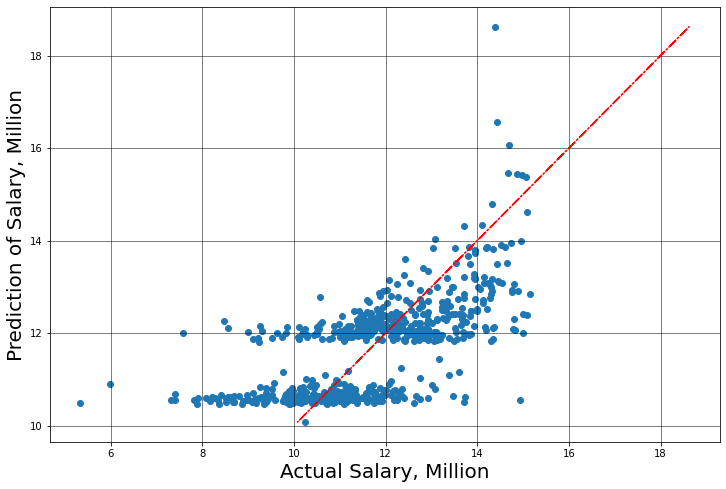

In [261]:
fig = plt.figure(figsize=(12,8))
plt.grid(color='black', linestyle='-', linewidth=.5)
plt.scatter(log_Y, prediction);
plt.plot(prediction, prediction, color = 'r', ls = '-.')
plt.xlabel('Actual Salary, Million', fontsize = 20)
plt.ylabel('Prediction of Salary, Log (Million)',fontsize = 20);
#fig.savefig('YvsPred.png', dpi=fig.dpi)

# With a resonable model, move on to validation

In [600]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2,random_state=48)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=.25, random_state=44)

In [601]:
Y_train

206     57538
619    358666
416    136591
167     51256
463     90145
        ...  
637    168746
291    414013
588    283951
403     70353
437    374035
Name: total_exec_comp, Length: 384, dtype: int64

In [534]:
print(X_train.shape, X_val.shape, X_test.shape)

(384, 8) (129, 8) (129, 8)


In [535]:
lr = LinearRegression()
X_train = X_train.loc[:,['num_employees','total_revenue', 'total_assets',
                         'independent_audit','percent_publicsupport','percent_investmentincome']]
X_val = X_val.loc[:,['num_employees','total_revenue','total_assets',
                         'independent_audit','percent_publicsupport','percent_investmentincome']]
X_test = X_test.loc[:,['num_employees','total_revenue','total_assets',
                         'independent_audit','percent_publicsupport','percent_investmentincome']]
# Choose the response variable(s)

# Fit the model to the full dataset
lr.fit(X_train, Y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,Y_train)

0.38689825063625016

In [528]:
lr.coef_

array([ 1.91209004e+03,  4.54754188e-02, -2.03262303e-03,  2.33149930e+05,
       -2.21401636e+02,  7.73905539e+03])

In [536]:
lr.score(X_val, Y_val)

0.45070301185100736

In [537]:
lr.score(X_test, Y_test)

0.4041549798006203

# Try Polynomial features

In [603]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)


In [604]:
lr.fit(X_train_poly, Y_train)
prediction = lr.predict(X_test_poly)
poly_score =lr.score(X_train_poly, Y_train)
poly_score

0.46086550332563203

In [540]:
poly_score = lr.score(X_val_poly, Y_val)
poly_score
#obviously this seems overfit but may be affected by outliers significantly

0.5335157802950312

In [541]:
poly_score = lr. score(X_test_poly, Y_test)
poly_score

0.3759490592192576

In [330]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x4^2',
 'x4 x5',
 'x5^2']

In [73]:
lr_coef = (str(lr.coef_.tolist()).split(','))


In [74]:
list(zip(poly.get_feature_names(), lr_coef))

[('1', '[0.0'),
 ('x0', ' 0.007058411237120779'),
 ('x1', ' 2.411554738453895e-07'),
 ('x2', ' 0.60192788853719'),
 ('x3', ' -0.0028226785514682147'),
 ('x4', ' -0.18691270894405657'),
 ('x0^2', ' -3.794183986655208e-05'),
 ('x0 x1', ' -2.346235329013152e-12'),
 ('x0 x2', ' 0.00026965197577670194'),
 ('x0 x3', ' -5.337514274293146e-05'),
 ('x0 x4', ' 0.0018941582039347328'),
 ('x1^2', ' -1.5414890731768013e-15'),
 ('x1 x2', ' -9.017269582737771e-08'),
 ('x1 x3', ' 5.952212201003471e-10'),
 ('x1 x4', ' -1.589931928697536e-08'),
 ('x2^2', ' 0.6019278844635707'),
 ('x2 x3', ' -0.002040916009152977'),
 ('x2 x4', ' -0.0017289120924921667'),
 ('x3^2', ' 4.4859299457140886e-05'),
 ('x3 x4', ' 0.0022755201991541928'),
 ('x4^2', ' 0.0013075207553107733]')]

(-50000.0, 4000000.0)

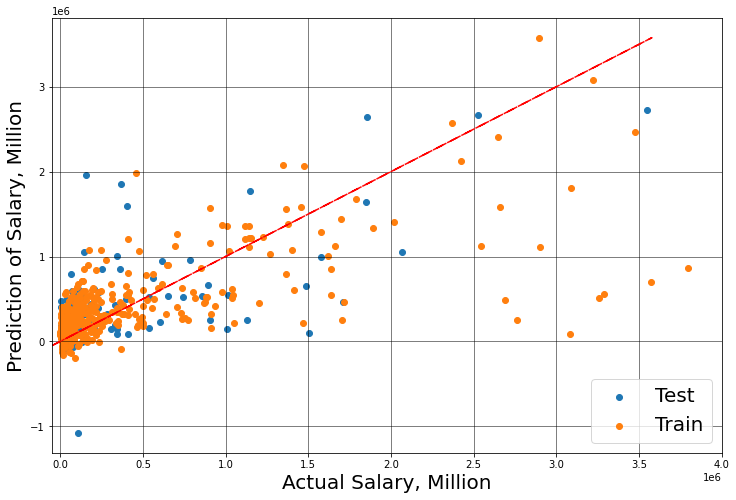

In [605]:
fig = plt.figure(figsize=(12,8))
plt.grid(color='black', linestyle='-', linewidth=.5)
plt.scatter(Y_test, prediction, label="Test");
plt.scatter(Y_train, lr.predict(X_train_poly), label="Train");
plt.plot(lr.predict(X_train_poly), lr.predict(X_train_poly), color = 'r', ls = '-.')
plt.legend(loc="lower right", prop={'size': 20})
plt.xlabel('Actual Salary, Million', fontsize = 20)
plt.ylabel('Prediction of Salary, Million',fontsize = 20);
plt.xlim((-50000, 4000000)) 
#fig.savefig('YvsPred.png', dpi=fig.dpi)

# Try ridge regression

In [610]:
mm = MinMaxScaler()
mm_Xtrain = mm.fit_transform(X_train_poly)
mm_Xval = mm.transform(X_val_poly)
mm_Xtest = mm.transform(X_test_poly)

In [607]:
Y_train

206     57538
619    358666
416    136591
167     51256
463     90145
        ...  
637    168746
291    414013
588    283951
403     70353
437    374035
Name: total_exec_comp, Length: 384, dtype: int64

In [615]:
alphavec = 10**np.linspace(0,10,10000)
lasso_model = LassoCV(alphas = alphavec, cv=5, max_iter=100000)
lasso_model.fit(mm_Xtrain, Y_train)
prediction = lasso_model.predict(mm_Xtest)

In [616]:
lasso_model.alpha_

402.03181821685905

In [617]:
lasso = Lasso(alpha = lasso_model.alpha_,max_iter=100000)

In [618]:
lasso.fit(mm_Xtrain, Y_train)
Y_predict = lasso_model.predict(mm_Xtest)

In [142]:
list(zip(poly.get_feature_names(), lasso_model.coef_))

[('1', 0.0),
 ('x0', 452359.8945330421),
 ('x1', 7221368.534565341),
 ('x2', 42433.65538527863),
 ('x3', -730305.4122050947),
 ('x4', 0.0),
 ('x0^2', -1255741.3988451997),
 ('x0 x1', 0.0),
 ('x0 x2', 118465.72540762226),
 ('x0 x3', 126729.75871176198),
 ('x0 x4', -0.0),
 ('x1^2', -5573219.396671476),
 ('x1 x2', -0.0),
 ('x1 x3', 180738.57749211453),
 ('x1 x4', -772331.8811943758),
 ('x2^2', 76805.27392943612),
 ('x2 x3', -0.0),
 ('x2 x4', 253787.37902074764),
 ('x3^2', 693920.4400419473),
 ('x3 x4', 178531.32232500223),
 ('x4^2', -0.0)]

In [619]:
r2_score(lasso.predict(mm_Xtrain), Y_train)

-0.22835140667808185

In [620]:
r2_score(Y_predict, Y_test)

0.2606582920837087

(-50000.0, 4000000.0)

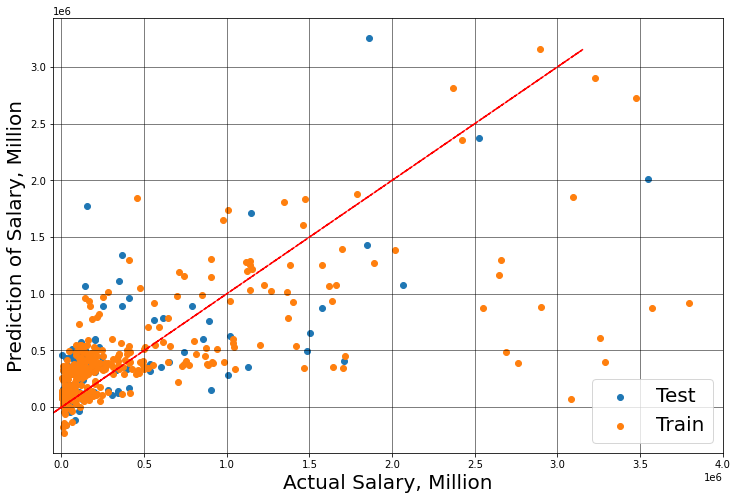

In [622]:
fig = plt.figure(figsize=(12,8))
plt.grid(color='black', linestyle='-', linewidth=.5)
plt.scatter(Y_test, prediction, label="Test");
plt.scatter(Y_train, lasso.predict(mm_Xtrain), label="Train");
plt.plot(lasso.predict(mm_Xtrain), lasso.predict(mm_Xtrain), color = 'r', ls = '-.')
plt.legend(loc="lower right", prop={'size': 20})
plt.xlabel('Actual Salary, Million', fontsize = 20)
plt.ylabel('Prediction of Salary, Million',fontsize = 20);
plt.xlim((-50000, 4000000)) 
#fig.savefig('YvsPred.png', dpi=fig.dpi)

# Last regression attempt will be a random forest

In [574]:
X = new_df_nozero[['num_governing', 'num_employees','total_revenue','total_expenses','total_assets','total_liabilities','independent_audit','percent_publicsupport','percent_investmentincome']]
Y = new_df_nozero['log_total_exec_comp']
              

In [623]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 48)

In [624]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
print(rf.score(X_train, Y_train))

0.9129861381339336


In [625]:
rf.score(X_train, Y_train)

0.9129861381339336

In [626]:
rf.score(X_test, Y_test)

0.5609346972296863

In [88]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [627]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300, num = 200)]
max_features = [ 1, 2, 3]
max_depth = [int(x) for x in np.linspace(2, 15, num = 10)]
max_depth.append(None)
min_samples_split = [1,2,3]
min_samples_leaf = [1, 2,3]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features':max_features,
               'bootstrap': bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}


In [631]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 800, cv = 5, verbose=2, 
                                n_jobs = -1)

In [632]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


/Users/matthewdupree/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.41116587 0.40309638 0.42746228 0.41378485 0.44027229        nan
        nan 0.43627495 0.4058911  0.41438198 0.3997843         nan
 0.41755063        nan 0.42517582 0.42658243 0.40449014 0.39578202
 0.41331713        nan 0.4163411  0.43828773 0.39945874 0.37294647
 0.40363444 0.40093593 0.41367119        nan 0.37507709 0.41814259
 0.3785303  0.40657767 0.42065867 0.43466233 0.41736438 0.39513185
 0.43601263 0.42385696 0.38085184 0.4108944         nan 0.41721611
        nan 0.4119049  0.43021959        nan        nan        nan
        nan 0.40260154 0.41664962 0.43920005 0.43180499 0.37831261
        nan        nan        nan 0.35278901 0.42439323 0.33897733
 0.42386129 0.17836004 0.41034769 0.40691413        nan 0.42103909
 0.37747726        nan 0.41323511 0.41042078 0.40270757 0.42255898
 0.34490239 0.4001746 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=800,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 4, 6, 7, 9, 10, 12,
                                                      13, 15, None],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [1, 2, 4, 5, 7, 8, 10,
                                                         11, 13, 14, 16, 17, 19,
                                                         20, 22, 23, 25, 26, 28,
                                                         29, 31, 32, 34, 35, 37,
                                                         38, 40, 41, 43, 44, ...]},
                   verbose=2)

In [633]:
rf_random.best_params_

{'n_estimators': 223,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 9,
 'bootstrap': True}

In [634]:
rf_random.score(X_train, Y_train)

0.8871625199485813

In [635]:
rf_random.score(X_test, Y_test)

0.5284398883219988

In [636]:
prediction = rf_random.predict(X_test)

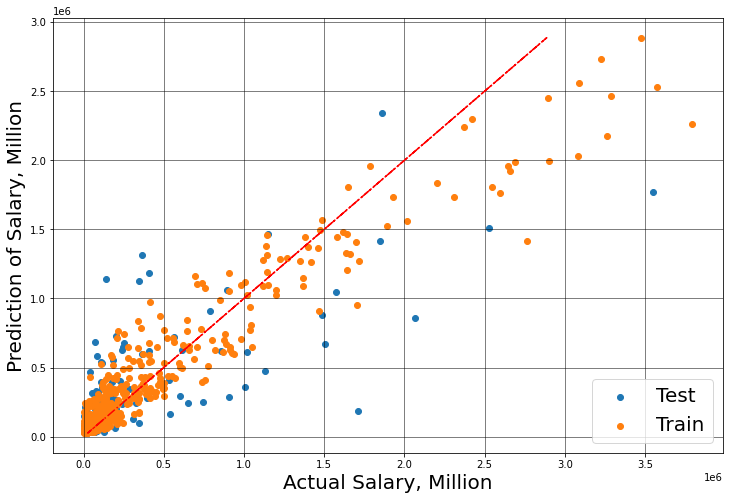

In [638]:
fig = plt.figure(figsize=(12,8))
plt.grid(color='black', linestyle='-', linewidth=.5)
plt.scatter(Y_test, prediction, label="Test");
plt.scatter(Y_train, rf_random.predict(X_train), label="Train");
plt.plot(rf_random.predict(X_train), rf_random.predict(X_train), color = 'r', ls = '-.')
plt.legend(loc="lower right", prop={'size': 20})
plt.xlabel('Actual Salary, Million', fontsize = 20)
plt.ylabel('Prediction of Salary, Million',fontsize = 20);
#fig.savefig('YvsPred.png', dpi=fig.dpi)